In [1]:
RANDOM_STATE = 7
N_CLUSTERS = 15
FINAL_FRAME_REPEAT = 5
DURATION_PER_FRAME = 100
LOOP_COUNT = 0
BOOMERANG = True
IMAGE_PATH = '../Image_Manipulation/Test_Images/Img_09.jpg'
OUTPUT_IMAGE_PATH = 'Img_09.jpg'
OUTPUT_GIF_PATH = 'Img_09.gif'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import IPython.display as display

In [3]:
display.Image(url = IMAGE_PATH, height = 500)

In [4]:
image = np.asarray(Image.open(IMAGE_PATH))
image.shape

(1080, 1920, 3)

In [5]:
df = pd.DataFrame()
df['r'] = pd.Series(image[:,:,0].flatten())
df['g'] = pd.Series(image[:,:,1].flatten())
df['b'] = pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,53,49,50
1,40,36,37
2,38,34,35
3,39,35,36
4,39,35,34


In [6]:
%%time

km = KMeans(n_clusters = N_CLUSTERS, random_state = RANDOM_STATE)
km.fit(df)
colors = km.cluster_centers_.astype('uint8')
colors

Wall time: 1min 17s


array([[132,  54,  69],
       [180, 181, 192],
       [ 23,  33,  10],
       [231, 119,  61],
       [ 77,  97, 122],
       [167, 130, 125],
       [237, 227, 197],
       [ 90,  92,  25],
       [127,  24,  11],
       [243, 213,  68],
       [ 52,  57,  75],
       [ 51,  61,  15],
       [148, 131,  32],
       [198,  61,  47],
       [119, 145, 171]], dtype=uint8)

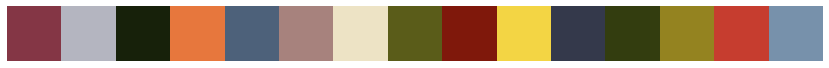

In [7]:
plt.figure(figsize = (N_CLUSTERS, 1))
plt.axis(False)
plt.grid(False)
plt.imshow([colors]);

In [8]:
pred = km.predict(df)
pred

array([10,  2,  2, ...,  2,  2,  2])

In [9]:
_, cluster_counts = np.unique(pred, return_counts = True)
cluster_counts

array([ 86972, 156967, 346723,  96987, 128860,  94926,  80033, 155846,
        69200,  93740, 134574, 268200,  77957, 130046, 152569],
      dtype=int64)

In [10]:
cluster_ids = cluster_counts.argsort()
cluster_counts.sort()
cluster_ids, cluster_counts

(array([ 8, 12,  6,  0,  9,  5,  3,  4, 13, 10, 14,  7,  1, 11,  2],
       dtype=int64),
 array([ 69200,  77957,  80033,  86972,  93740,  94926,  96987, 128860,
        130046, 134574, 152569, 155846, 156967, 268200, 346723],
       dtype=int64))

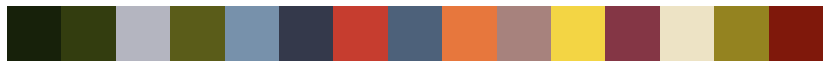

In [11]:
plt.figure(figsize = (N_CLUSTERS, 1))
plt.axis(False)
plt.grid(False)
plt.imshow([colors[cluster_ids[::-1]]]);

In [12]:
reshaped_pred = pred.reshape(image.shape[:2])
reshaped_pred

array([[10,  2,  2, ..., 10, 10, 10],
       [10,  2,  2, ..., 10, 10, 10],
       [10,  2,  2, ..., 10, 10, 10],
       ...,
       [11,  2, 11, ...,  2,  2,  2],
       [11,  2,  2, ...,  2,  2,  2],
       [ 2, 11, 11, ...,  2,  2,  2]])

In [13]:
all_imgs = np.zeros((N_CLUSTERS + 1, *image.shape), dtype='uint8')
new_img = np.zeros(image.shape, dtype='uint8')
new_img[:] = 255
all_imgs[0] = new_img

for i in range(N_CLUSTERS):
    new_img = new_img.copy()
    new_img[np.where(reshaped_pred == cluster_ids[-(i + 1)])] = colors[cluster_ids[-(i + 1)]]
    all_imgs[i + 1] = new_img

Image.fromarray(all_imgs[N_CLUSTERS], 'RGB').save(OUTPUT_IMAGE_PATH)
display.Image(url = OUTPUT_IMAGE_PATH, height = 500)

In [14]:
imgs = []
for i in range(N_CLUSTERS + 1):
    img = Image.fromarray(all_imgs[i], 'RGB')
    imgs.append(img)

for i in range(FINAL_FRAME_REPEAT):
    imgs.append(imgs[N_CLUSTERS])

if BOOMERANG:
    for i in range(N_CLUSTERS - 1, 0, -1):
        imgs.append(imgs[i])

In [15]:
imgs[0].save(
    OUTPUT_GIF_PATH, 
    save_all = True, 
    append_images = imgs[1:], 
    optimize = False, 
    duration = DURATION_PER_FRAME, 
    loop = LOOP_COUNT
)

In [16]:
display.Image(url = OUTPUT_GIF_PATH, height = 500)